# ARC Prize 2024

This notebook is an experimental approach on solving the ARC challenge. See https://arcprize.org/ for more details.

In [12]:
import arc2024.kaggle_competition as kc
import arc2024.dataset_visualize as vis

from pathlib import Path

## Download and pre-process Dataset

In [13]:
dataset_dir = Path('datasets')
kc.download_files(dataset_dir=dataset_dir, force=False)

training_challenges_json = kc.json_file_read(dataset_dir / 'arc-agi_training_challenges.json')
training_solutions_json = kc.json_file_read(dataset_dir / 'arc-agi_training_solutions.json')

evaluation_challenges_json = kc.json_file_read(dataset_dir / 'arc-agi_evaluation_challenges.json')
evaluation_solutions_json = kc.json_file_read(dataset_dir / 'arc-agi_evaluation_solutions.json')

training_tensors = kc.challenges_and_solutions_to_tensors(
    training_challenges_json,
    training_solutions_json,
    permutations=True
)

evaluation_tensors = kc.challenges_and_solutions_to_tensors(
    evaluation_challenges_json,
    evaluation_solutions_json,
    permutations=False
)

## Visualize Random Challenge from Training Dataset

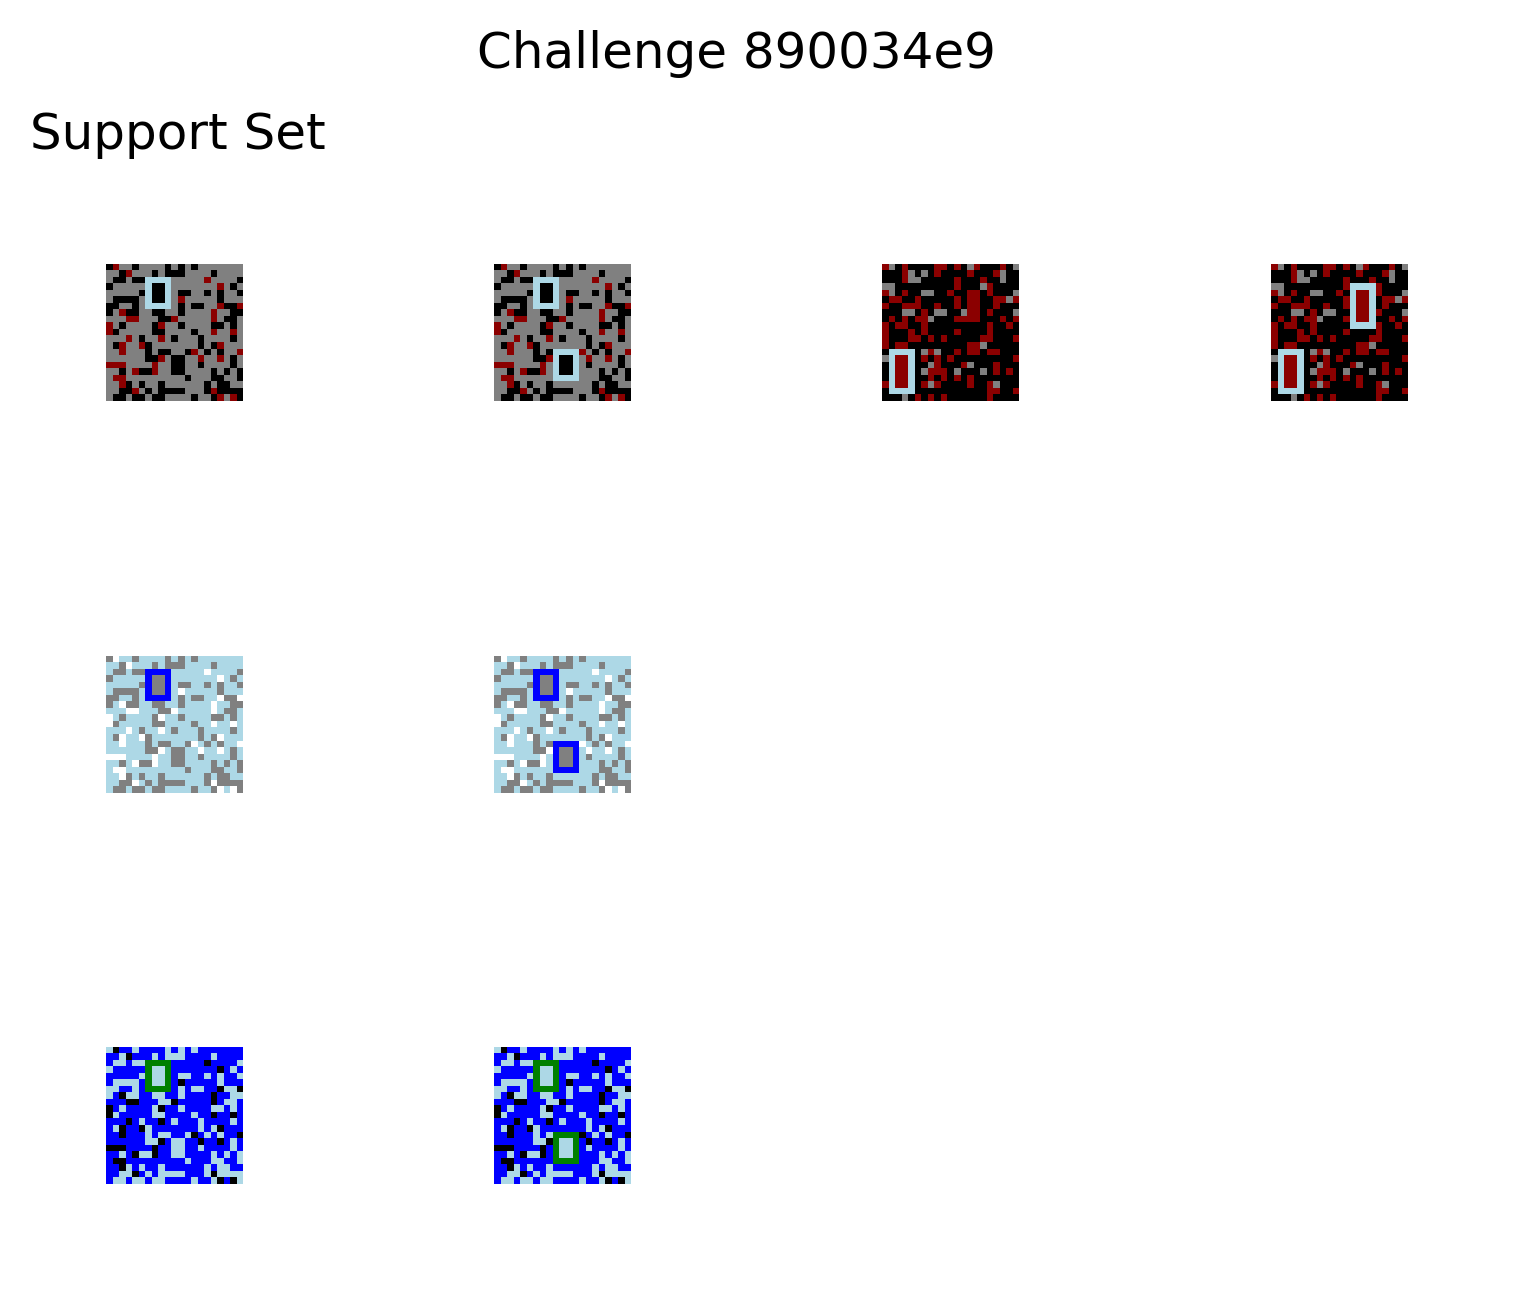

In [29]:
import random

# random.seed(42)

visualizable_tensors = training_tensors
visualize_n_support_set_tensors = 3

random_challenge_id = random.choice(list(visualizable_tensors.keys()))
random_challenge = visualizable_tensors[random_challenge_id]

support_set_inputs = random_challenge['support_set_inputs'][:visualize_n_support_set_tensors]
support_set_outputs = random_challenge['support_set_outputs'][:visualize_n_support_set_tensors]

query_inputs = random_challenge['query_inputs']
query_outputs = random_challenge['query_outputs']

vis.challenge_plot(
    challenge_id=random_challenge_id,
    support_set_inputs=support_set_inputs,
    support_set_outputs=support_set_outputs,
    query_inputs=query_inputs,
    query_outputs=query_outputs
)